In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

In [2]:
particles_per_seconds = np.array( [1,0.93, 0.95, 0.84, 0.88, 1.05, 0.96, 0.91, 0.98, 1.1, 1.04])
multiplier = 6.15839e-5

monolayer_per_seconds = particles_per_seconds * multiplier

In [6]:
monolayer_per_seconds.mean(), monolayer_per_seconds.std()

(5.956842690909092e-05, 4.541375892286701e-06)

(array([4.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00,
        4.0000e+00, 3.0000e+00, 6.0000e+00, 9.0000e+00, 1.1000e+01,
        1.6000e+01, 3.5000e+01, 4.6000e+01, 6.0000e+01, 8.7000e+01,
        1.5400e+02, 1.7800e+02, 2.7600e+02, 3.9100e+02, 4.7100e+02,
        6.4600e+02, 8.1300e+02, 1.0930e+03, 1.4720e+03, 1.9060e+03,
        2.4020e+03, 2.9890e+03, 3.8310e+03, 4.7340e+03, 5.7320e+03,
        6.9230e+03, 8.5110e+03, 9.9150e+03, 1.0288e+04, 1.3466e+04,
        1.5494e+04, 1.7762e+04, 1.9783e+04, 2.2281e+04, 2.4428e+04,
        2.7010e+04, 2.9330e+04, 3.1877e+04, 3.4005e+04, 3.5454e+04,
        3.6922e+04, 3.8247e+04, 3.9542e+04, 3.9418e+04, 3.9925e+04,
        3.9704e+04, 3.8820e+04, 3.7579e+04, 3.6473e+04, 3.4881e+04,
        3.2647e+04, 3.0841e+04, 2.8375e+04, 2.6087e+04, 2.3710e+04,
        2.1358e+04, 1.8942e+04, 1.6764e+04, 1.4660e+04, 1.2689e+04,
        1.0833e+04, 8.3640e+03, 7.7540e+03, 6.4350e+03, 5.3930e+03,
        4.2860e+03, 3.4130e+03, 2.8400e+03, 2.19

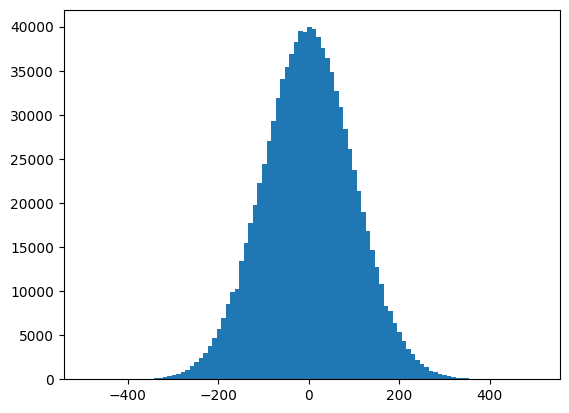

In [26]:
# gausian random numbers between -1 and 1. 9999 of them
random_numbers = np.floor(np.random.normal(0,100,999999))

plt.hist(random_numbers, bins=100)

In [27]:
# using pandas find mode of random numbers. basically the most common number
pd.Series(random_numbers).mode()

0    14.0
dtype: float64

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import use

# Use Qt backend for interactive window
use('Qt5Agg')

# Parameters
L = 20e-3  # Length of the cylinder in meters
D = 4.5e-12  # Diffusion coefficient in m^2/s
N = 100  # Number of spatial points (discretization)
dx = L / N  # Spatial step size
dt = 100  # Adjusted time step in seconds


# Adjusting animation parameters
frame_interval = 0  # Interval between frames in milliseconds (adjust as needed)
total_frames = 9999  # Total number of frames in the animation

# Initial condition: concentration is highest at the center
concentration = np.zeros(N)
center = N // 2
concentration[center - 1:center + 1] = 1  # Setting initial concentration at the center

# Tracking the peak and minimum concentrations over time
peak_concentrations = []
min_concentrations = []
times = []

# Diffusion equation: discretization using finite differences
def diffuse(concentration):
    new_concentration = np.copy(concentration)
    for i in range(1, N-1):
        new_concentration[i] = concentration[i] + (D * dt / dx**2) * (concentration[i+1] - 2*concentration[i] + concentration[i-1])
    return new_concentration

# Prepare the animation
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 9))
line1, = ax1.plot(np.linspace(0, L, N), concentration, color='blue')
ax1.set_xlim(0, L)
ax1.set_ylim(0, 1.1)
ax1.set_xlabel('Length of Cylinder (m)')
ax1.set_ylabel('Concentration')
time_text = ax1.text(0.02, 0.95, '', transform=ax1.transAxes)

# Setup for the peak concentration plot
line2, = ax2.plot([], [], color='red')
ax2.set_xlim(0, total_frames * dt / 3600)  # Time in hours
ax2.set_ylim(0, 1.1)
ax2.set_xlabel('Time (hours)')
ax2.set_ylabel('Peak Concentration')

# Setup for the minimum concentration plot
line3, = ax3.plot([], [], color='green')
ax3.set_xlim(0, total_frames * dt / 3600)  # Time in hours
ax3.set_ylim(0, 0.01)
ax3.set_xlabel('Time (hours)')
ax3.set_ylabel('Concentration at some bin')

# Animation function
def animate(frame):
    global concentration
    concentration = diffuse(concentration)
    peak_concentrations.append(np.max(concentration))
    # min_concentrations.append(np.min(concentration))
    # append the concentration at the 10th point to the min_concentrations list
    min_concentrations.append(concentration[20])
    times.append(frame * dt / 3600)

    line1.set_ydata(concentration)
    time_text.set_text(f'Time: {times[-1]:.2f} hours')

    line2.set_data(times, peak_concentrations)
    line3.set_data(times, min_concentrations)

    

    return line1, line2, line3, time_text

# Create and start the animation
ani = animation.FuncAnimation(fig, animate, frames=total_frames, interval=frame_interval, blit=True, repeat=False)
plt.show()


In [1]:
import pandas as pd

In [10]:
sheet_1 = pd.read_excel(r"C:\Users\Admin\Downloads\CanLncG4-master\CanLncG4-master\python_server\sheet_1.xlsx")
map_lcrna_name_to_alias = {}

# get the map from lcrna name to alias
for index, row in sheet_1.iterrows():
    map_lcrna_name_to_alias[row['lncrna_name']] = row['aliases']


In [25]:
sheet_A = pd.read_excel(r"C:\Users\Admin\Downloads\CanLncG4-master\CanLncG4-master\python_server\LncRNA-interaction-partners\A.xlsx")
sheet_B = pd.read_excel(r"C:\Users\Admin\Downloads\CanLncG4-master\CanLncG4-master\python_server\LncRNA-interaction-partners\B.xlsx")
sheet_C = pd.read_excel(r"C:\Users\Admin\Downloads\CanLncG4-master\CanLncG4-master\python_server\LncRNA-interaction-partners\C.xlsx")
sheet_D = pd.read_excel(r"C:\Users\Admin\Downloads\CanLncG4-master\CanLncG4-master\python_server\LncRNA-interaction-partners\D.xlsx")

# add aliases column to each sheet based on column "Interactor Name" and map_lcrna_name_to_alias
sheet_A['aliases'] = sheet_A['Interactor Name'].map(map_lcrna_name_to_alias)
sheet_C['aliases'] = sheet_C['Interactor Name'].map(map_lcrna_name_to_alias)

# if there is no alias, then fill it with ""
sheet_A['aliases'].fillna("", inplace=True)
sheet_C['aliases'].fillna("", inplace=True)
sheet_B['aliases'] = sheet_B['Regulator Name'].map(map_lcrna_name_to_alias)
sheet_D['aliases'] = sheet_D['Regulator Name'].map(map_lcrna_name_to_alias)

# if there is no alias, then fill it with ""
sheet_B['aliases'].fillna("", inplace=True)
sheet_D['aliases'].fillna("", inplace=True)



In [28]:
# save the new sheets to excel files
sheet_A.to_excel(r"C:\Users\Admin\Downloads\CanLncG4-master\CanLncG4-master\python_server\LncRNA-interaction-partners\A.xlsx")
sheet_B.to_excel(r"C:\Users\Admin\Downloads\CanLncG4-master\CanLncG4-master\python_server\LncRNA-interaction-partners\B.xlsx")
sheet_C.to_excel(r"C:\Users\Admin\Downloads\CanLncG4-master\CanLncG4-master\python_server\LncRNA-interaction-partners\C.xlsx")
sheet_D.to_excel(r"C:\Users\Admin\Downloads\CanLncG4-master\CanLncG4-master\python_server\LncRNA-interaction-partners\D.xlsx")